In [99]:
#kaggle datasets download -d itssuru/loan-data

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("/content/loan_data.csv")

In [102]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# **Data Exploration**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [104]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [105]:
df.isna().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [106]:
num_cols = df.select_dtypes(include=np.number).columns
print(num_cols)

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


In [107]:
num_cols = ['int.rate', 'installment', 'log.annual.inc','dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

# **Scatterplot**

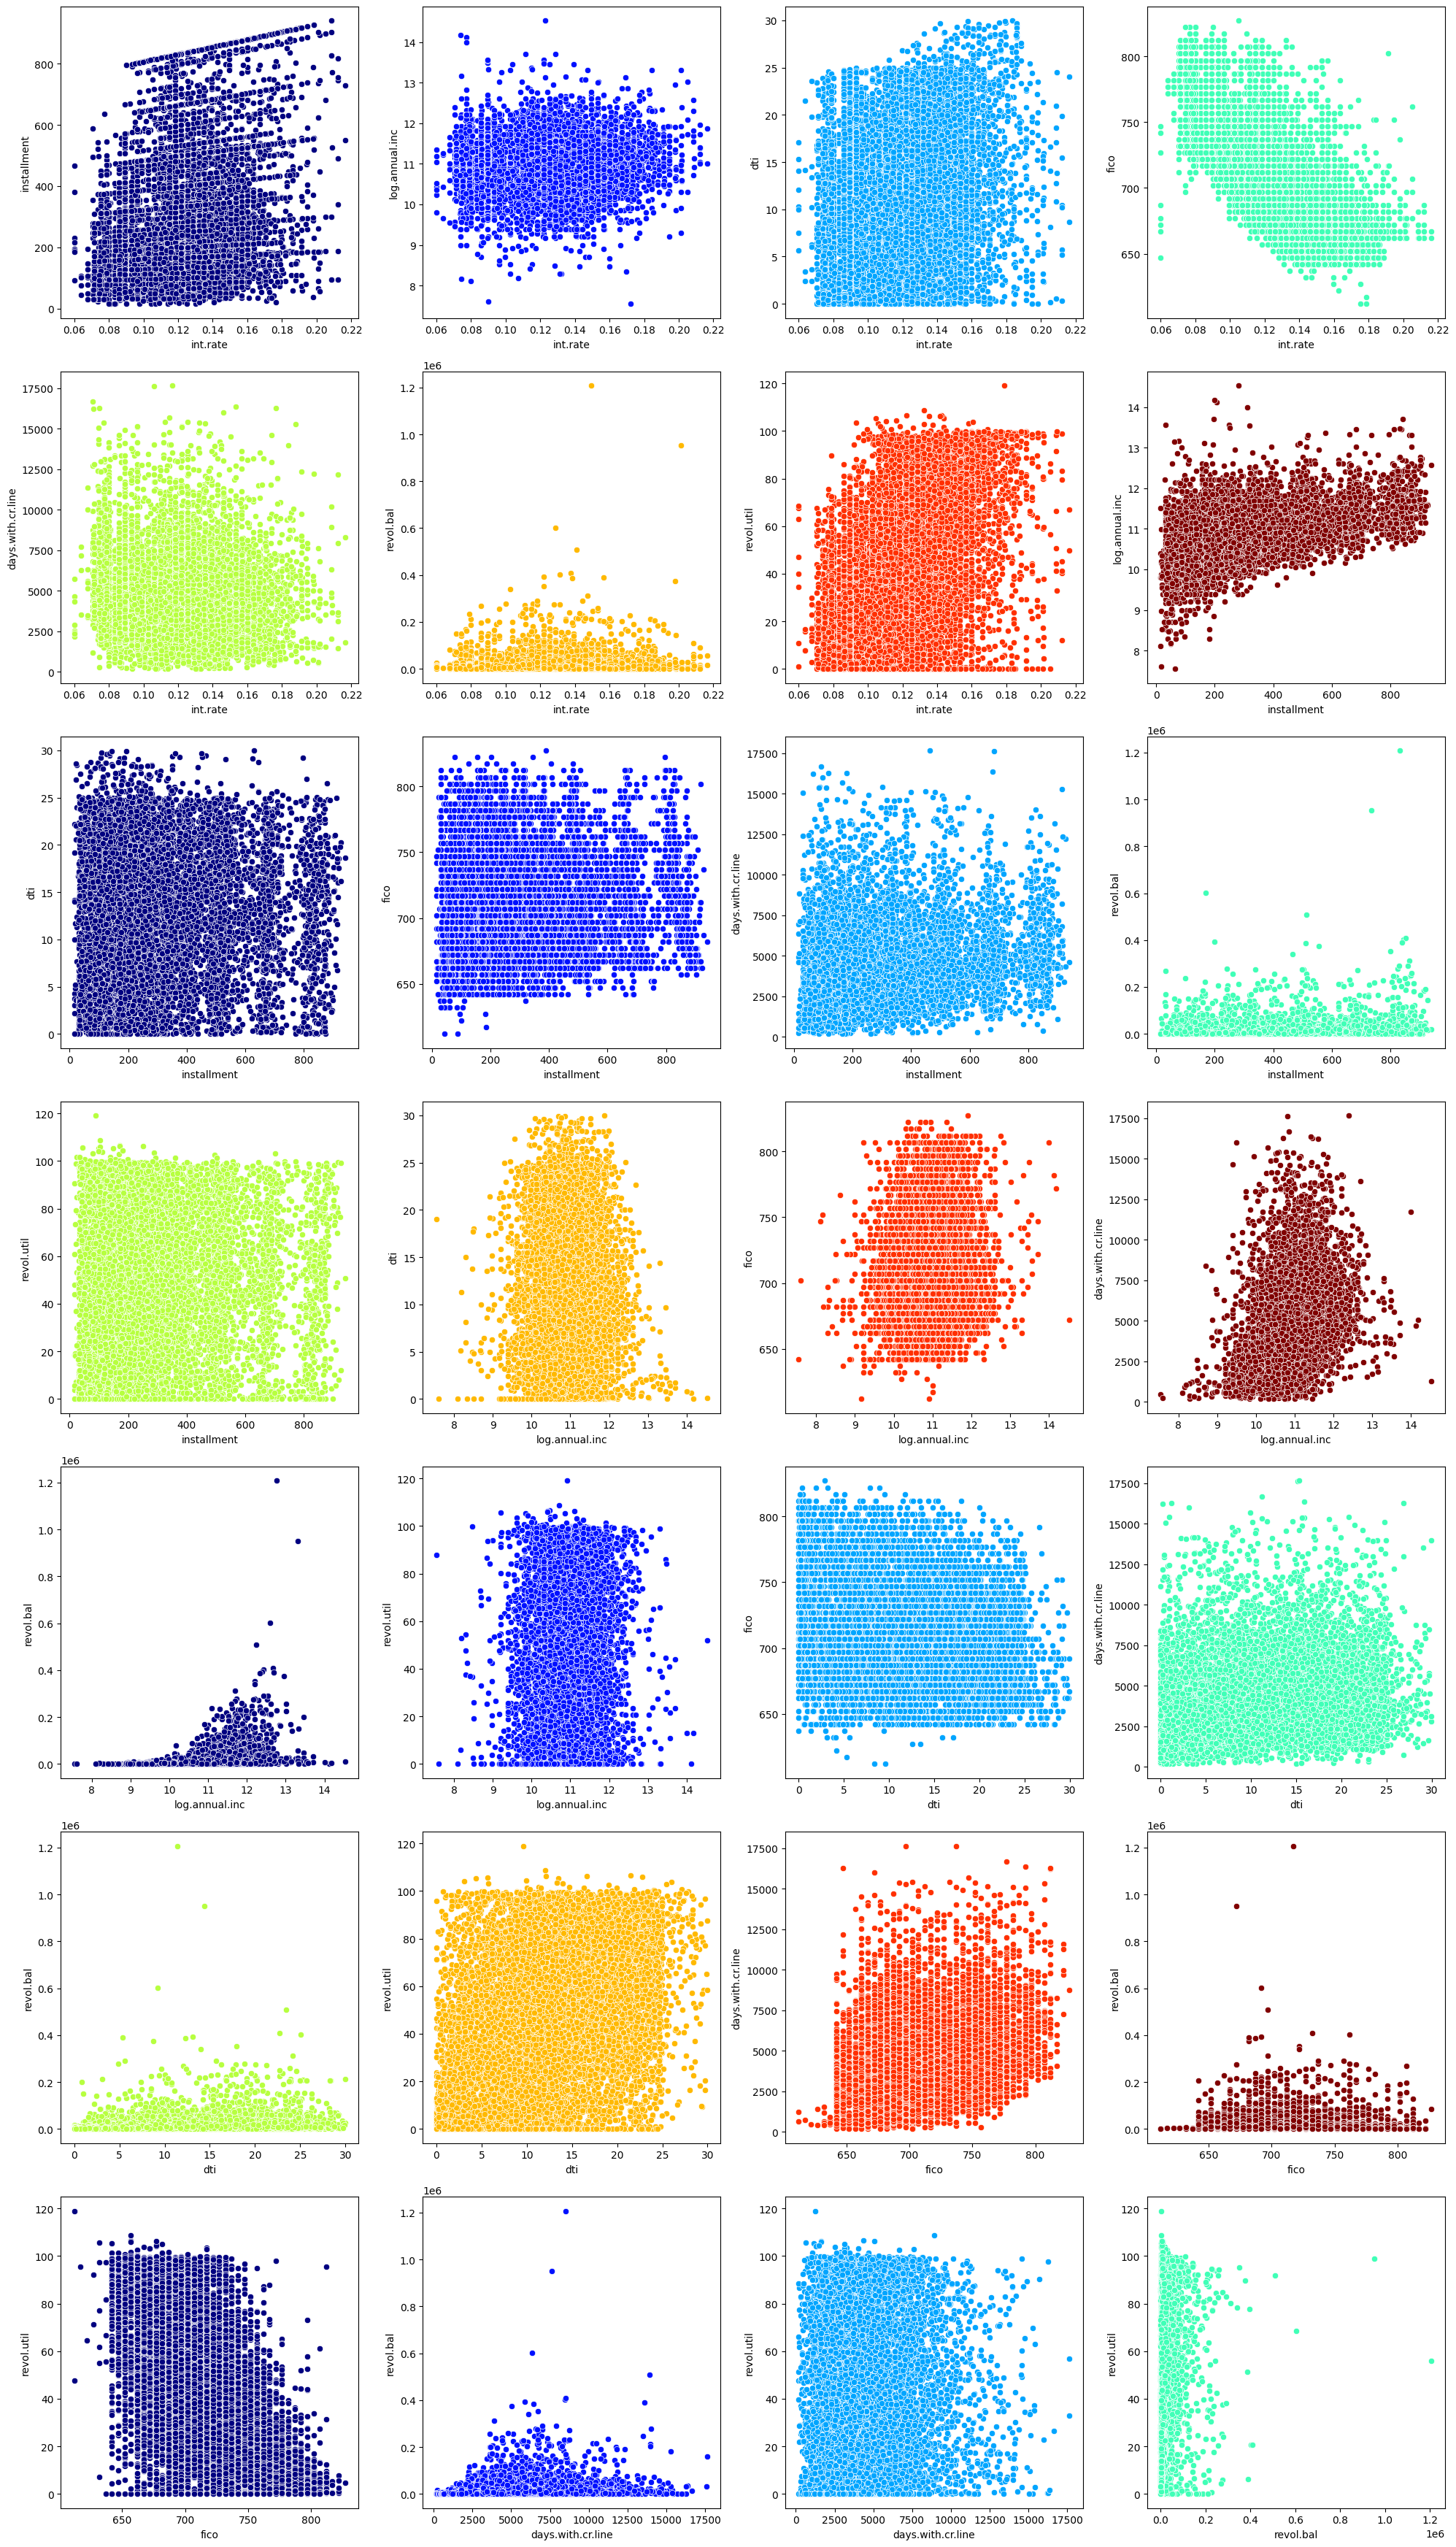

In [108]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(col1, col2, ax, color):
    sns.scatterplot(x=df[col1], y=df[col2], ax=ax, color=color)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)

colors = plt.cm.jet(np.linspace(0, 1, len(num_cols)))

col_pairs = list(itertools.combinations(num_cols, 2))

ncols = 4
nrows = int(np.ceil(len(col_pairs) / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
axs = axs.flatten()

for idx, (col1, col2) in enumerate(col_pairs):
    if idx < len(axs):
        color_idx = idx % len(colors)
        plot_scatter(col1, col2, axs[idx], colors[color_idx])

for i in range(len(col_pairs), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


# **Comparison of Mean Values for Numerical Features by Revenue Category**

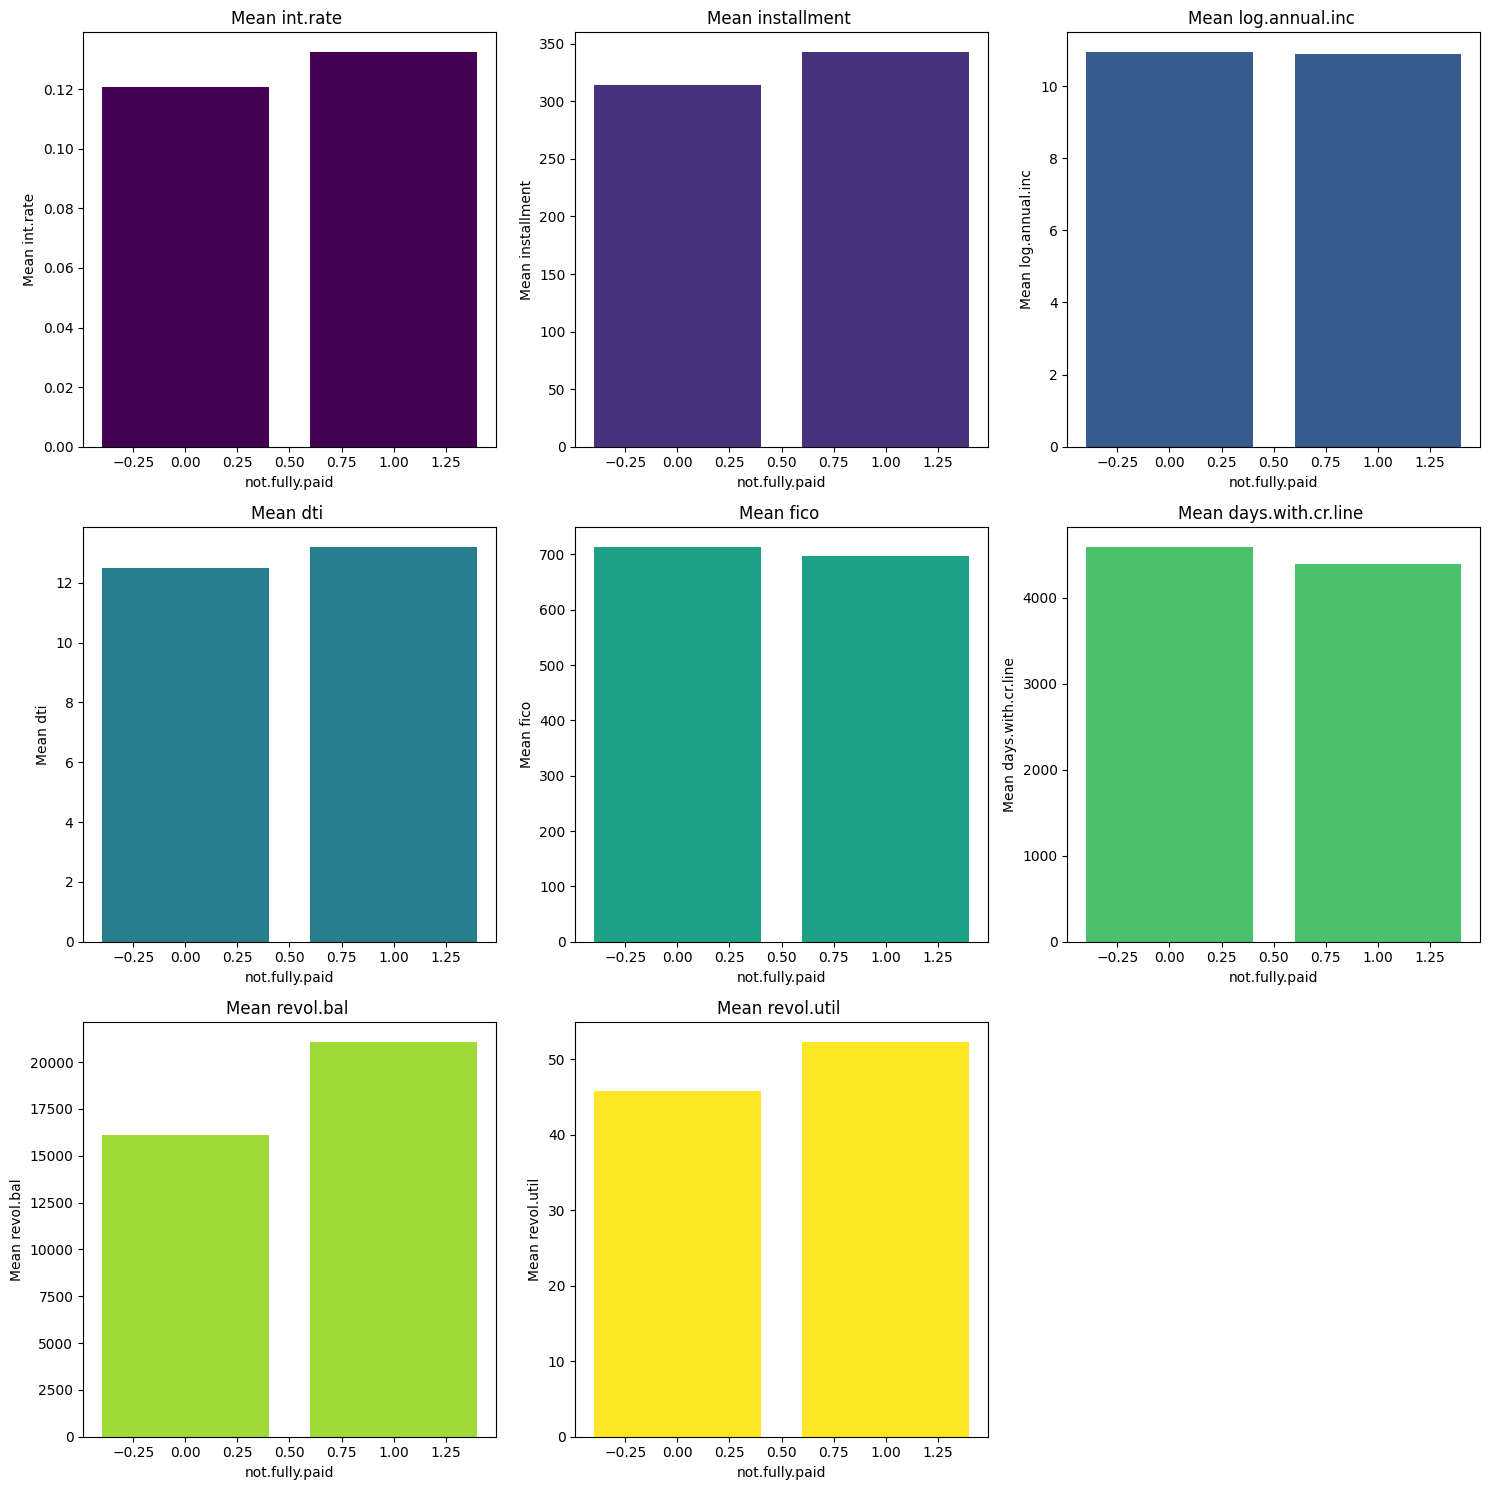

In [109]:
def numeric_charts(col, ax, color):

    a = df.groupby("not.fully.paid")[col].mean()


    ax.bar(x=a.index, height=a.values, color=color)

    ax.set_xlabel("not.fully.paid")
    ax.set_ylabel(f"Mean {col}")
    ax.set_title(f"Mean {col} ")


# num_cols = df.select_dtypes(include=np.number).columns
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))
colors = plt.cm.viridis(np.linspace(0, 1, len(num_cols)))


fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
ax = ax.flatten()


for idx, col in enumerate(num_cols):
    numeric_charts(col, ax[idx], colors[idx])

for j in range(len(num_cols), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()


# **Boxplot**

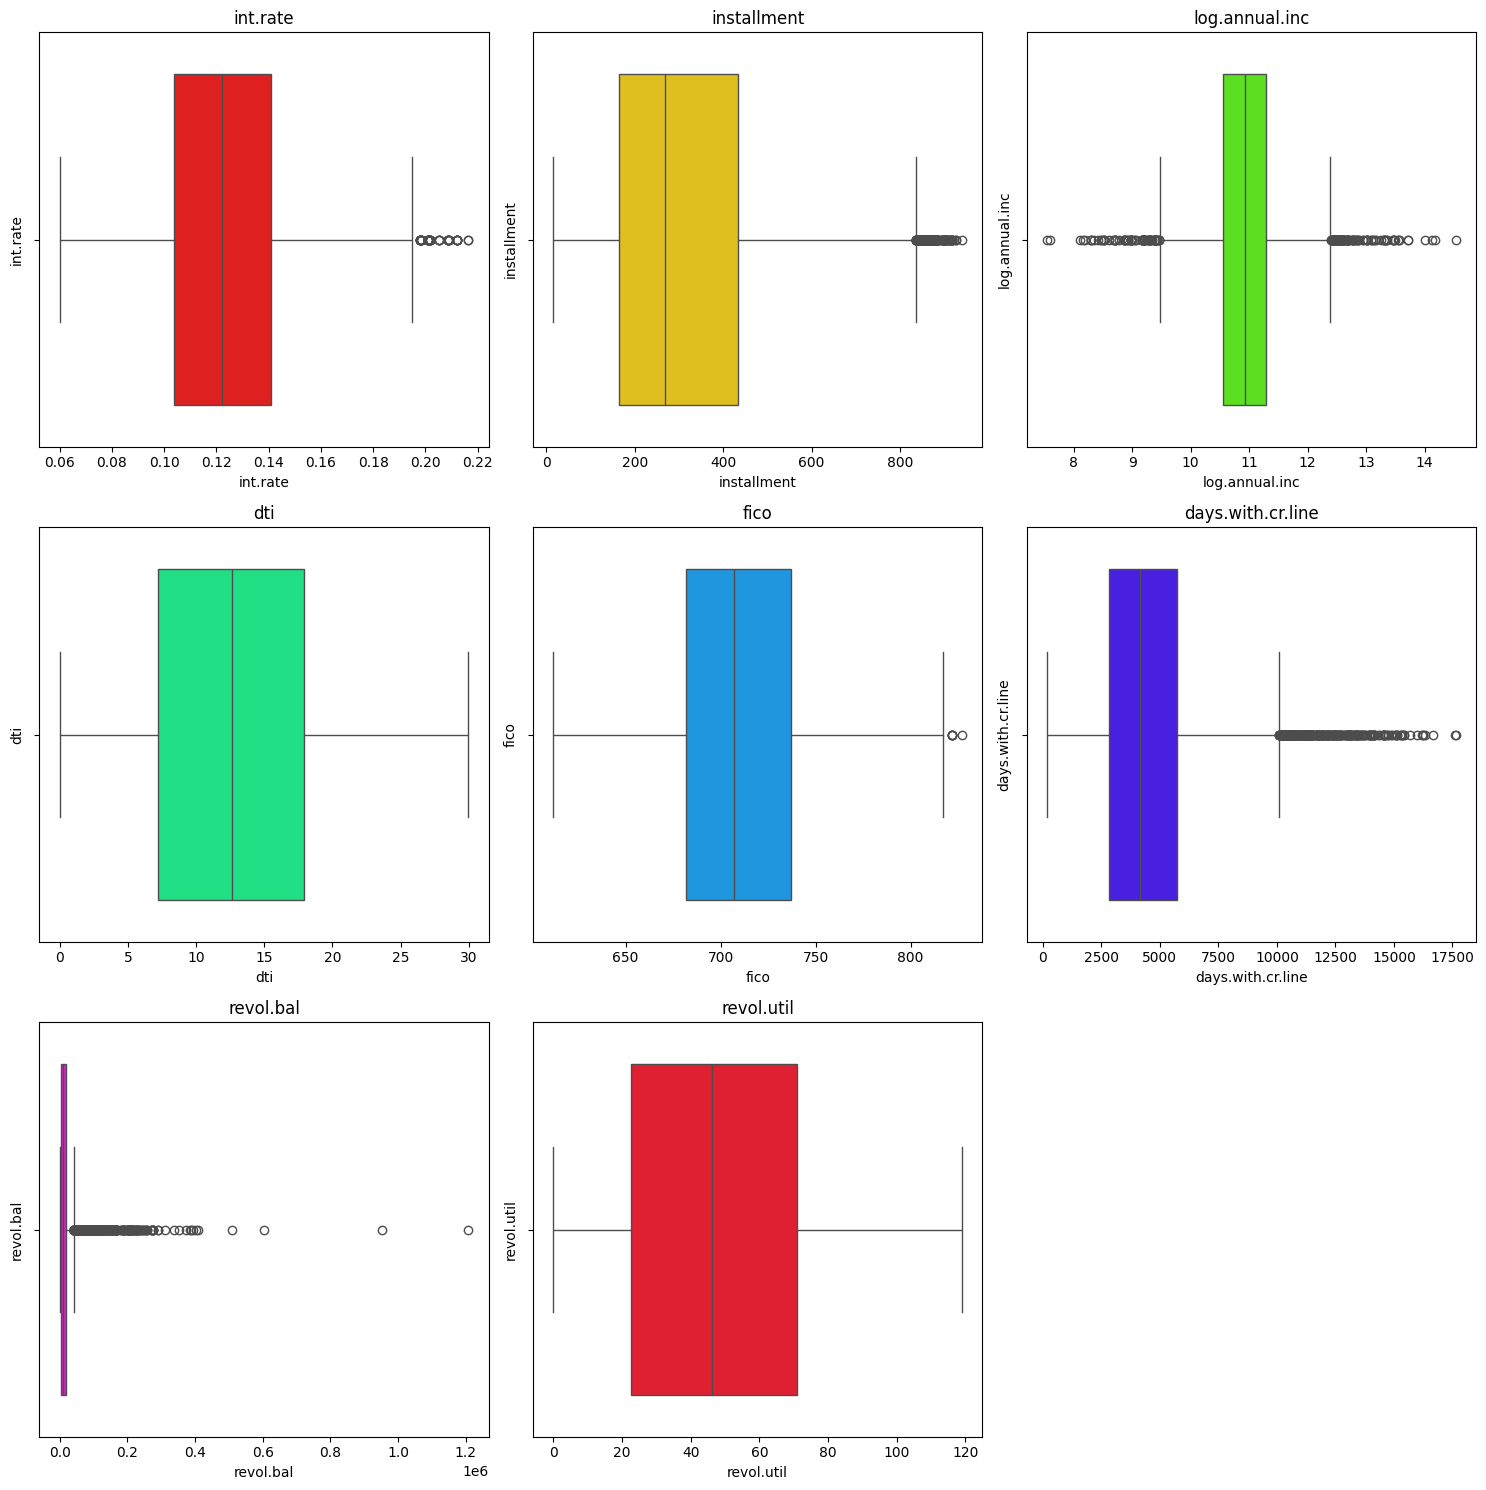

In [110]:
num_cols = ['int.rate', 'installment', 'log.annual.inc','dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))
colors = plt.cm.hsv(np.linspace(0, 1, len(num_cols)))


fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
ax = ax.flatten()


for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=ax[idx], orient='h',color=colors[idx])
    ax[idx].set_title(f"{col}")
    ax[idx].set_ylabel(col)


for j in range(len(num_cols), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

# **Handling outliers**

In [111]:
def outlier_handler(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Variance before handling outliers in {col}: {df[col].var()}")


    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    print(f"Variance after handling outliers in {col}: {df[col].var()}")
    return df


for i in num_cols:
    df = outlier_handler(df, i)




Variance before handling outliers in int.rate: 0.0007207607224355354
Variance after handling outliers in int.rate: 0.0007139508194785295
Variance before handling outliers in installment: 42878.52390484531
Variance after handling outliers in installment: 42058.191976811
Variance before handling outliers in log.annual.inc: 0.3779947192282065
Variance after handling outliers in log.annual.inc: 0.3399806281686346
Variance before handling outliers in dti: 47.38903663507679
Variance after handling outliers in dti: 47.38903663507679
Variance before handling outliers in fico: 1441.7616972853036
Variance after handling outliers in fico: 1441.29874550667
Variance before handling outliers in days.with.cr.line: 6234661.30664326
Variance after handling outliers in days.with.cr.line: 5226355.429875894
Variance before handling outliers in revol.bal: 1139480333.4250312
Variance after handling outliers in revol.bal: 150158629.67090836
Variance before handling outliers in revol.util: 841.8363918560797
V

In [112]:
cat_col = [i for i in df.columns if df[i].dtypes == "O"]
num_cols = [i for i in df.columns if df[i].dtypes != "O"]

In [113]:
df.purpose.value_counts()

,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


# **Using anova and chi-squared for feature selection**

In [114]:
import pandas as pd
from scipy.stats import f_oneway


numerical_features = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'not.fully.paid']

insignificant_columns_anova = []


for feature in numerical_features:
  groups = [df[feature][df['not.fully.paid'] == i] for i in df['not.fully.paid'].unique()]
  f_statistic, p_value = f_oneway(*groups)
  print(f"ANOVA for {feature} vs not.fully.paid:")
  print(f"  F-statistic: {f_statistic}")
  print(f"  P-value: {p_value}")
  if p_value > 0.05:
    insignificant_columns_anova.append(feature)

print("List of insignificant columns:")
print(insignificant_columns_anova)


ANOVA for credit.policy vs not.fully.paid:
  F-statistic: 245.5552407442428
  P-value: 1.1511954682379684e-54
ANOVA for int.rate vs not.fully.paid:
  F-statistic: 249.85748580376463
  P-value: 1.4022915228255786e-55
ANOVA for installment vs not.fully.paid:
  F-statistic: 22.769191446494236
  P-value: 1.8537243572900257e-06
ANOVA for log.annual.inc vs not.fully.paid:
  F-statistic: 11.230495251262392
  P-value: 0.0008077547033304926
ANOVA for dti vs not.fully.paid:
  F-statistic: 13.385664867366511
  P-value: 0.0002549163767584894
ANOVA for fico vs not.fully.paid:
  F-statistic: 219.47368980114132
  P-value: 4.111810950773911e-49
ANOVA for days.with.cr.line vs not.fully.paid:
  F-statistic: 8.481128213278708
  P-value: 0.0035967816117193543
ANOVA for revol.bal vs not.fully.paid:
  F-statistic: 11.77308170063053
  P-value: 0.0006034722287212917
ANOVA for revol.util vs not.fully.paid:
  F-statistic: 64.9646918203177
  P-value: 8.537810348218273e-16
ANOVA for inq.last.6mths vs not.fully.pa

In [115]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

categorical_features = [col for col in df.columns if pd.api.types.is_string_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]

insignificant_columns = []


for feature in categorical_features:
  contingency_table = pd.crosstab(df[feature], df['not.fully.paid'])
  chi2, p_value, _, _ = chi2_contingency(contingency_table)
  print(f"Chi-Squared test for {feature} vs not.fully.paid:")
  print(f"  Chi-squared statistic: {chi2}")
  print(f"  P-value: {p_value}")
  if p_value > 0.05:
    insignificant_columns.append(feature)

print("List of insignificant columns:")
print(insignificant_columns)


Chi-Squared test for purpose vs not.fully.paid:
  Chi-squared statistic: 96.98469589063261
  P-value: 1.0672453117980422e-18
List of insignificant columns:
[]


In [116]:
df.drop('delinq.2yrs', axis=1, inplace=True)

# **Feature engineering Scaling and One-Hot Encoding**

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import pandas as pd


num_col = [i for i in df.columns if df[i].dtype != 'object' and i != 'not.fully.paid']
cat_col = [i for i in df.columns if df[i].dtype == 'object' and i != 'not.fully.paid']


target_column = 'not.fully.paid'


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_col)
    ],
    remainder='passthrough'
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


X_transformed = pipeline.fit_transform(df.drop(columns=[target_column]))

transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

transformed_df = pd.DataFrame(X_transformed, columns=transformed_feature_names)

label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

final_df = pd.concat([transformed_df, df[[target_column]]], axis=1)

In [118]:
df = final_df

In [119]:
df.head()

,num__credit.policy,num__int.rate,num__installment,num__log.annual.inc,num__dti,num__fico,num__days.with.cr.line,num__revol.bal,num__revol.util,num__inq.last.6mths,num__pub.rec,cat__purpose_all_other,cat__purpose_credit_card,cat__purpose_debt_consolidation,cat__purpose_educational,cat__purpose_home_improvement,cat__purpose_major_purchase,cat__purpose_small_business,not.fully.paid
0,0.492222,-0.138372,2.490699,0.718364,0.998505,0.688991,0.502853,1.318657,0.182704,-0.716989,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.492222,-0.580014,-0.439419,0.258258,0.244540,-0.101264,-0.756970,1.707859,1.030602,-0.716989,-0.237003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.492222,0.490407,0.236642,-0.957167,-0.141885,-0.759809,0.096048,-0.749605,-0.730683,-0.262470,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.492222,-0.815806,-0.760674,0.718364,-0.654697,0.030445,-0.783235,1.711450,0.909966,-0.262470,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.492222,0.748655,-1.050429,0.631452,0.343326,-1.154936,-0.185667,-0.649305,-0.251586,-0.716989,-0.237003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


# **Training and evaluating XG BOOST LogisticRegression RandomForestClassifier**

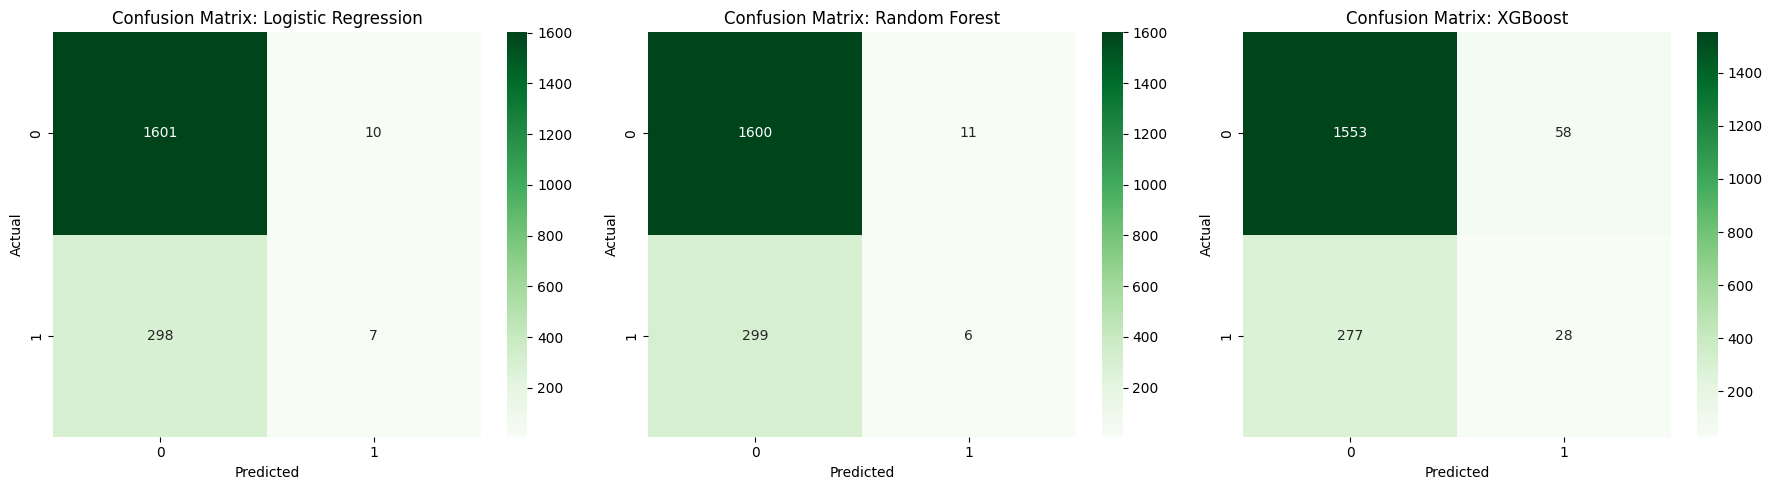

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.41      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.63      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916


Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.35      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.60      0.51      0.47      1916
weighted avg       0.76      0.84      0.77      1916


XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1611
           1       0.33      0.09      0.14       305

    accuracy                           0.83      1916
   macro avg       0.59      0.53      0.52      1916
weighted avg       0.77    

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_confusion_matrix(y_test, lr_y_pred, "Logistic Regression", axs[0])
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest", axs[1])
plot_confusion_matrix(y_test, xgb_y_pred, "XGBoost", axs[2])

plt.tight_layout()
plt.show()

print("Logistic Regression:")
print(classification_report(y_test, lr_y_pred, target_names=['0', '1']))

print("\nRandom Forest:")
print(classification_report(y_test, rf_y_pred, target_names=['0', '1']))

print("\nXGBoost:")
print(classification_report(y_test, xgb_y_pred, target_names=['0', '1']))


# **Training and evaluating XG BOOST LogisticRegression RandomForestClassifier with SMOTE**

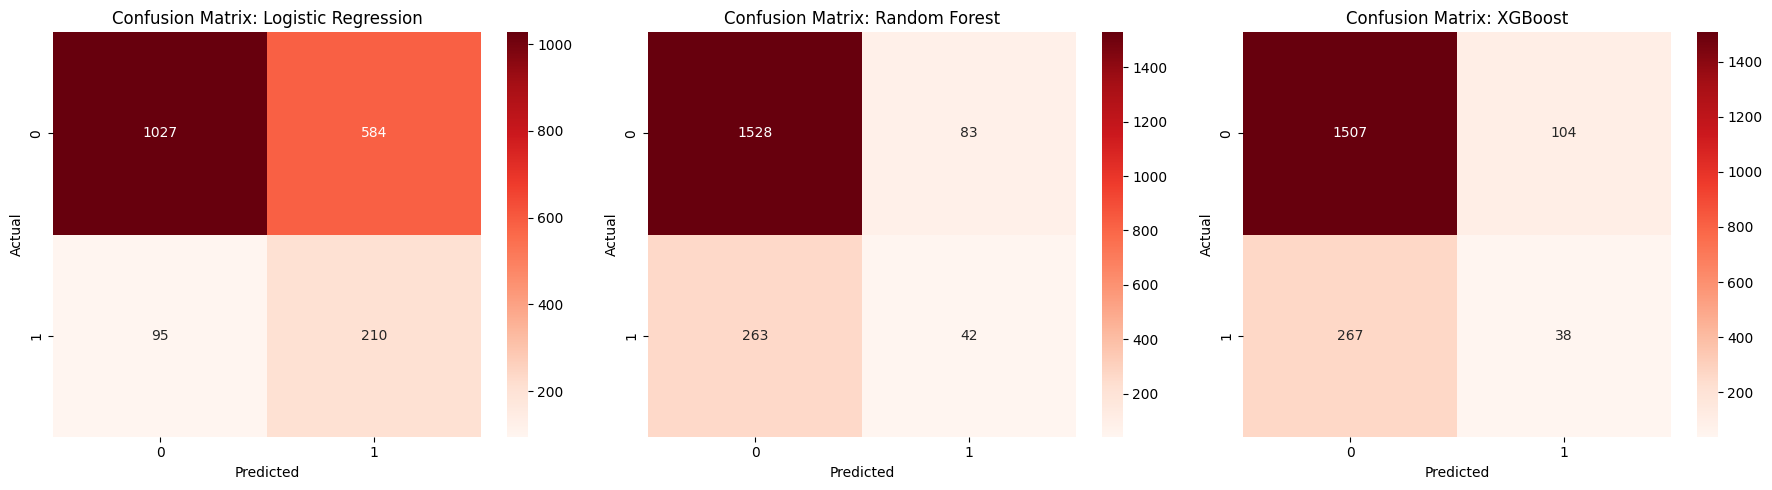

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.64      0.75      1611
           1       0.26      0.69      0.38       305

    accuracy                           0.65      1916
   macro avg       0.59      0.66      0.57      1916
weighted avg       0.81      0.65      0.69      1916


Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1611
           1       0.34      0.14      0.20       305

    accuracy                           0.82      1916
   macro avg       0.59      0.54      0.55      1916
weighted avg       0.77      0.82      0.79      1916


XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1611
           1       0.27      0.12      0.17       305

    accuracy                           0.81      1916
   macro avg       0.56      0.53      0.53      1916
weighted avg       0.76    

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)
lr_y_pred = lr_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_model.predict(X_test)

xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_y_pred = xgb_model.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_confusion_matrix(y_test, lr_y_pred, "Logistic Regression", axs[0])
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest", axs[1])
plot_confusion_matrix(y_test, xgb_y_pred, "XGBoost", axs[2])

plt.tight_layout()
plt.show()

print("Logistic Regression:")
print(classification_report(y_test, lr_y_pred))

print("\nRandom Forest:")
print(classification_report(y_test, rf_y_pred))

print("\nXGBoost:")
print(classification_report(y_test, xgb_y_pred))


# **Training and evaluating BalancedRandomForestClassifier, EasyEnsembleClassifier**

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


--- Balanced Random Forest ---
              precision    recall  f1-score   support

           0       0.90      0.61      0.73      1609
           1       0.24      0.63      0.34       307

    accuracy                           0.62      1916
   macro avg       0.57      0.62      0.54      1916
weighted avg       0.79      0.62      0.67      1916

------------------
--- Easy Ensemble ---
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1609
           1       0.24      0.55      0.33       307

    accuracy                           0.65      1916
   macro avg       0.56      0.61      0.55      1916
weighted avg       0.78      0.65      0.69      1916

------------------


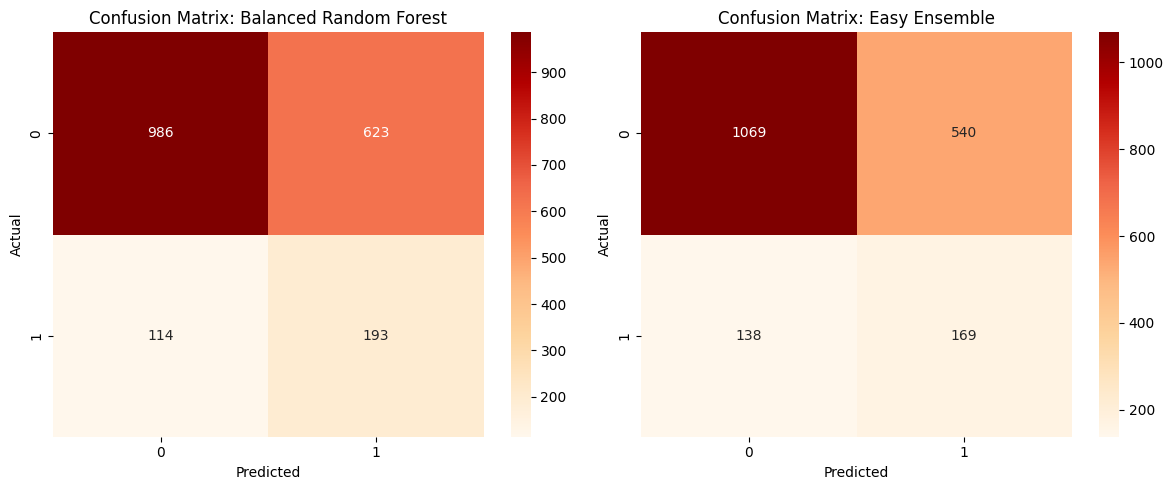

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

target_column = 'not.fully.paid'

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', ax=ax,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred, target_names=['0', '1']))
    print("------------------")

    return y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

y_pred_rf = train_and_evaluate(BalancedRandomForestClassifier(random_state=42), "Balanced Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, "Balanced Random Forest", axes[0])

y_pred_easy = train_and_evaluate(EasyEnsembleClassifier(random_state=42, n_estimators=100), "Easy Ensemble")
plot_confusion_matrix(y_test, y_pred_easy, "Easy Ensemble", axes[1])

plt.tight_layout()
plt.show()


# **Logistic regression yielded the best results.**
# **Fine tuning Logistic regression hyperparameters**

Best Parameters: {'logreg__C': 0.01, 'logreg__class_weight': None, 'logreg__penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.91      0.61      0.73      1611
           1       0.25      0.70      0.37       305

    accuracy                           0.62      1916
   macro avg       0.58      0.65      0.55      1916
weighted avg       0.81      0.62      0.67      1916



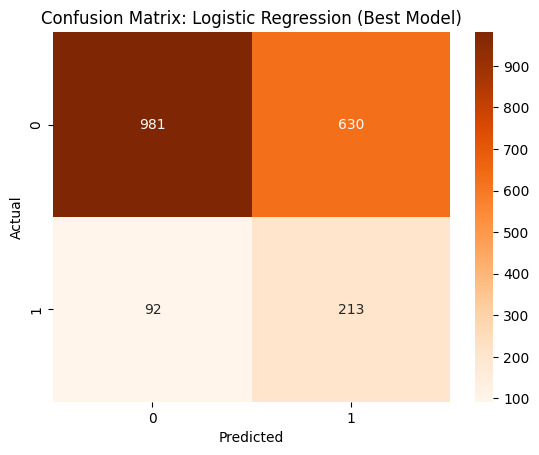

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train = X_train_resampled
y_train = y_train_resampled

pipeline = Pipeline([
    ('logreg', LogisticRegression(solver='liblinear'))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred, "Logistic Regression (Best Model)")
